# Stitching and Normalisation

In this notebook we look at how to stitch CMIP6 output files together to create continuous timeseries and how to determine how to normalise these files e.g. calculate anomalies against piControl runs.

In [64]:
# NBVAL_IGNORE_OUTPUT
import datetime as dt
import os.path
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import pyam
import pymagicc
from netcdf_scm.io import load_scmdataframe
from scmdata import df_append

In [2]:
plt.style.use('bmh') 
%matplotlib inline

## Command line interface help

The help can be accessed via our command line interface.

In [3]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm-stitch -h

Usage: netcdf-scm-stitch [OPTIONS] SRC DST STITCH_CONTACT

  Stitch NetCDF-SCM ``.nc`` files together and write out in the specified
  format.

  ``SRC`` is searched recursively and netcdf-scm will attempt to stitch all
  the files found. Output is written in ``DST``.

  ``STITCH_CONTACT`` is written into the header of the output files.

Options:
  --regexp TEXT                   Regular expression to apply to file
                                  directory (only stitches matches).
                                  [default: ^(?!.*(fx)).*$]
  --prefix TEXT                   Prefix to apply to output file names (not
                                  paths).
  --out-format [mag-files|mag-files-average-year-start-year|mag-files-average-year-mid-year|mag-files-average-year-end-year|mag-files-point-start-year|mag-files-point-mid-year|mag-files-point-end-year|magicc-input-files|magicc-input-files-average-year-start-year|magicc-input-files-average-year-mid-year|magicc-input-files-average-yea

## Stitching

Stitching simply refers to joining a child scenario with its parent. For example, an ssp with its corresponding historical run.

In [4]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm-stitch "../tests/test-data/expected-crunching-output/cmip6output/CMIP6" "../output-examples/stitched-files" "notebook example <email address>" --force --drs "CMIP6Output" --regexp ".*EC-Earth3-Veg.*ssp585.*r1i1p1f1.*hfds.*"

2019-11-08 11:02:22,890 INFO:netcdf_scm:netcdf-scm: 2.0.0-beta.1+12.ge0d22ff
2019-11-08 11:02:22,890 INFO:netcdf_scm:stitch-contact: notebook example <email address>
2019-11-08 11:02:22,890 INFO:netcdf_scm:source: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/tests/test-data/expected-crunching-output/cmip6output/CMIP6
2019-11-08 11:02:22,891 INFO:netcdf_scm:destination: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/output-examples/stitched-files
2019-11-08 11:02:22,891 INFO:netcdf_scm:regexp: .*EC-Earth3-Veg.*ssp585.*r1i1p1f1.*hfds.*
2019-11-08 11:02:22,891 INFO:netcdf_scm:prefix: None
2019-11-08 11:02:22,891 INFO:netcdf_scm:out-format: mag-files
2019-11-08 11:02:22,891 INFO:netcdf_scm:drs: CMIP6Output
2019-11-08 11:02:22,891 INFO:netcdf_scm:force: True
2019-11-08 11:02:22,891 INFO:netcdf_scm:number-workers: 4
2019-11-08 11:02:22,891 INFO:netcdf_scm:target-units-specs: None
2019-11-08 11:02:22,891 INFO:netcdf_scm:normalise: None
2019-11-08 11:02:22,891 INFO:netcdf_scm:Finding dir

We can then load the resulting files using Pymagicc.

In [9]:
written_files = [f for f in Path("../output-examples/stitched-files/flat").rglob("*.MAG")]
written_files

[PosixPath('../output-examples/stitched-files/flat/netcdf-scm_hfds_Omon_EC-Earth3-Veg_ssp585_r1i1p1f1_gn_201501-201712.MAG')]

As we can see below, the output file is the result of joining the scenario and historical file (i.e. we have data pre-2015, which is when the scenario started).

In [10]:
stitched = pymagicc.io.MAGICCData(str(written_files[0]))
stitched.timeseries()

time                                                                                           2012-01-15 12:00:00  \
model       scenario    region                          variable unit      climate_model todo                        
unspecified unspecified World                           hfds     Wmsuper-2 unspecified   SET               6.09994   
                        World|El Nino N3.4              hfds     Wmsuper-2 unspecified   SET              42.06670   
                        World|North Atlantic Ocean      hfds     Wmsuper-2 unspecified   SET            -131.94000   
                        World|Northern Hemisphere       hfds     Wmsuper-2 unspecified   SET            -104.36000   
                        World|Northern Hemisphere|Ocean hfds     Wmsuper-2 unspecified   SET            -104.36000   
                        World|Ocean                     hfds     Wmsuper-2 unspecified   SET               6.09994   
                        World|Southern Hemisphere       hfds     Wmsuper-2 unspecified   SET              93.36680   
                        World|Southern Hemisphere|Ocean hfds     Wmsuper-2 unspecified   SET              93.36680   

time                                                                                           2012-02-14 12:00:00  \
model       scenario    region                          variable unit      climate_model todo                        
unspecified unspecified World                           hfds     Wmsuper-2 unspecified   SET               2.72503   
                        World|El Nino N3.4              hfds     Wmsuper-2 unspecified   SET              60.51390   
                        World|North Atlantic Ocean      hfds     Wmsuper-2 unspecified   SET             -72.55420   
                        World|Northern Hemisphere       hfds     Wmsuper-2 unspecified   SET             -71.78500   
                        World|Northern Hemisphere|Ocean hfds     Wmsuper-2 unspecified   SET             -71.78500   
                        World|Ocean                     hfds     Wmsuper-2 unspecified   SET               2.72503   
                        World|Southern Hemisphere       hfds     Wmsuper-2 unspecified   SET              61.59030   
                        World|Southern Hemisphere|Ocean hfds     Wmsuper-2 unspecified   SET              61.59030   

time                                                                                           2012-03-15 12:00:00  \
model       scenario    region                          variable unit      climate_model todo                        
unspecified unspecified World                           hfds     Wmsuper-2 unspecified   SET             -0.248865   
                        World|El Nino N3.4              hfds     Wmsuper-2 unspecified   SET             64.278200   
                        World|North Atlantic Ocean      hfds     Wmsuper-2 unspecified   SET            -26.789700   
                        World|Northern Hemisphere       hfds     Wmsuper-2 unspecified   SET            -16.934200   
                        World|Northern Hemisphere|Ocean hfds     Wmsuper-2 unspecified   SET            -16.934200   
                        World|Ocean                     hfds     Wmsuper-2 unspecified   SET             -0.248865   
                        World|Southern Hemisphere       hfds     Wmsuper-2 unspecified   SET             12.933100   
                        World|Southern Hemisphere|Ocean hfds     Wmsuper-2 unspecified   SET             12.933100   

time                                                                                           2012-04-15 00:00:00  \
model       scenario    region                          variable unit      climate_model todo                        
unspecified unspecified World                           hfds     Wmsuper-2 unspecified   SET              -9.44095   
                        World|El Nino N3.4              hfds     Wmsuper-2 unspecified   SET           

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working


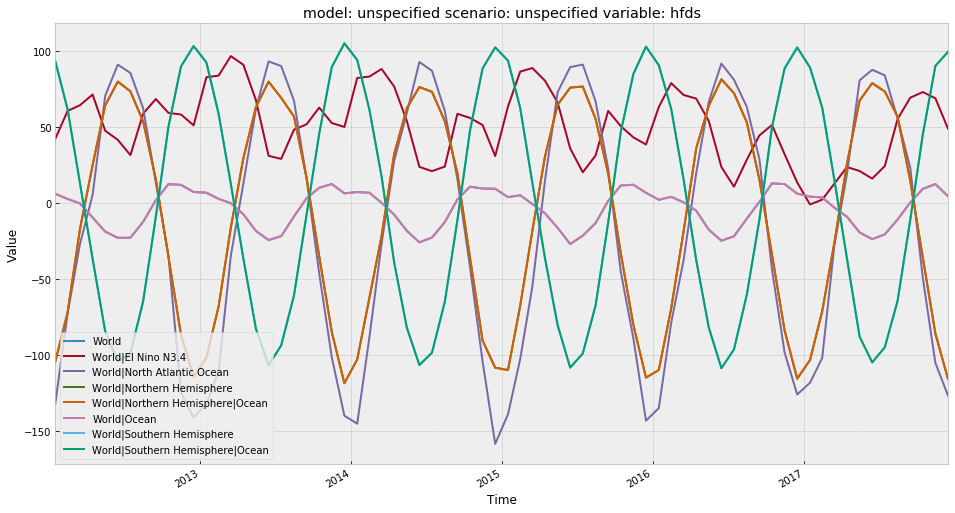

In [11]:
# NBVAL_IGNORE_OUTPUT
stitched.line_plot(color="region", figsize=(16, 9))

The files are also written with extensive metadata, which we can access via the `MAGICCData` instance's `.metadata` attribute. The 'child' metadata is the metadata of the 'child' simulation (in this case 'ssp585') while the parent data is the data from the simulation the 'child' branched off (in this case 'historical').

In [12]:
# NBVAL_IGNORE_OUTPUT
stitched.metadata

{'timeseriestype': 'MONTHLY',
 'date': '2019-11-08 11:02:26',
 'contact': 'notebook example <email address>',
 '(child) CDI': 'Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/cdi)',
 '(child) CDO': 'Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/cdo)',
 '(child) Conventions': 'CF-1.5',
 '(child) area_world (m**2)': '4592406696896.0',
 '(child) area_world_el_nino_n3.4 (m**2)': '59942346240.0',
 '(child) area_world_north_atlantic_ocean (m**2)': '499489548032.0',
 '(child) area_world_northern_hemisphere (m**2)': '2026861311360.0',
 '(child) area_world_northern_hemisphere_ocean (m**2)': '2026861311360.0',
 '(child) area_world_ocean (m**2)': '4592406696896.0',
 '(child) area_world_southern_hemisphere (m**2)': '2565545385536.0',
 '(child) area_world_southern_hemisphere_ocean (m**2)': '2565545385536.0',
 '(child) branch_method': 'standard',
 '(child) branch_time_in_child': '60265.0',
 '(child) branch_time_in_parent': '60265.0',
 '(child) calendar': 'proleptic_gregorian'

## Stitching and normalising

On top of stitching, we might also normalise. This means we find the piControl run, and then normalise our output data against the piControl somehow. At the moment, the only method we have implemented is normalising against a mean of the 31 years after the branch time (31 years so that if the branch time is 1960, we take data from 1960 up to and including 1991) in the piControl, but we can add more if required.

In [14]:
# NBVAL_IGNORE_OUTPUT
!netcdf-scm-stitch "../tests/test-data/expected-crunching-output/cmip6output/CMIP6" "../output-examples/stitched-normalised-files" "notebook example <email address>" --force --drs "CMIP6Output" --regexp ".*BCC-CSM2-MR.*ssp126.*tas.*" --normalise "31-yr-mean-after-branch-time"

2019-11-08 11:09:48,816 INFO:netcdf_scm:netcdf-scm: 2.0.0-beta.1+12.ge0d22ff
2019-11-08 11:09:48,817 INFO:netcdf_scm:stitch-contact: notebook example <email address>
2019-11-08 11:09:48,817 INFO:netcdf_scm:source: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/tests/test-data/expected-crunching-output/cmip6output/CMIP6
2019-11-08 11:09:48,817 INFO:netcdf_scm:destination: /Users/znicholls/Documents/AGCEC/Misc/netcdf-scm/output-examples/stitched-normalised-files
2019-11-08 11:09:48,817 INFO:netcdf_scm:regexp: .*BCC-CSM2-MR.*ssp126.*tas.*
2019-11-08 11:09:48,817 INFO:netcdf_scm:prefix: None
2019-11-08 11:09:48,817 INFO:netcdf_scm:out-format: mag-files
2019-11-08 11:09:48,817 INFO:netcdf_scm:drs: CMIP6Output
2019-11-08 11:09:48,817 INFO:netcdf_scm:force: True
2019-11-08 11:09:48,817 INFO:netcdf_scm:number-workers: 4
2019-11-08 11:09:48,817 INFO:netcdf_scm:target-units-specs: None
2019-11-08 11:09:48,817 INFO:netcdf_scm:normalise: 31-yr-mean-after-branch-time
2019-11-08 11:09:48,817 INFO:

In [15]:
written_files = [f for f in Path("../output-examples/stitched-normalised-files/flat").rglob("*.MAG")]
written_files

[PosixPath('../output-examples/stitched-normalised-files/flat/netcdf-scm_tas_Amon_BCC-CSM2-MR_ssp126_r1i1p1f1_gn_201501-210012.MAG')]

In [16]:
stitched_normalised = pymagicc.io.MAGICCData(str(written_files[0]))
stitched_normalised.timeseries()

time                                                                                      1850-01-15 12:00:00  \
model       scenario    region                          variable unit climate_model todo                        
unspecified unspecified World                           tas      K    unspecified   SET              -2.08592   
                        World|El Nino N3.4              tas      K    unspecified   SET               1.06368   
                        World|Land                      tas      K    unspecified   SET              -6.49922   
                        World|North Atlantic Ocean      tas      K    unspecified   SET              -1.68370   
                        World|Northern Hemisphere       tas      K    unspecified   SET              -6.71904   
                        World|Northern Hemisphere|Land  tas      K    unspecified   SET             -12.48810   
                        World|Northern Hemisphere|Ocean tas      K    unspecified   SET              -3.02400   
                        World|Ocean                     tas      K    unspecified   SET              -0.28553   
                        World|Southern Hemisphere       tas      K    unspecified   SET               2.54719   
                        World|Southern Hemisphere|Land  tas      K    unspecified   SET               5.86804   
                        World|Southern Hemisphere|Ocean tas      K    unspecified   SET               1.77295   

time                                                                                      1850-02-14 00:00:00  \
model       scenario    region                          variable unit climate_model todo                        
unspecified unspecified World                           tas      K    unspecified   SET             -1.851060   
                        World|El Nino N3.4              tas      K    unspecified   SET              1.114390   
                        World|Land                      tas      K    unspecified   SET             -6.259700   
                        World|North Atlantic Ocean      tas      K    unspecified   SET             -2.103410   
                        World|Northern Hemisphere       tas      K    unspecified   SET             -6.332030   
                        World|Northern Hemisphere|Land  tas      K    unspecified   SET            -11.188000   
                        World|Northern Hemisphere|Ocean tas      K    unspecified   SET             -3.221840   
                        World|Ocean                     tas      K    unspecified   SET             -0.052571   
                        World|Southern Hemisphere       tas      K    unspecified   SET              2.629900   
                        World|Southern Hemisphere|Land  tas      K    unspecified   SET              3.917360   
                        World|Southern Hemisphere|Ocean tas      K    unspecified   SET              2.329740   

time                                                                                      1850-03-15 12:00:00  \
model       scenario    region                          variable unit climate_model todo                        
unspecified unspecified World                           tas      K    unspecified   SET             -1.396900   
                        World|El Nino N3.4              tas      K    unspecified   SET              0.732798   
                        World|Land                      tas      K    unspecified   SET             -4.732470   
                        World|North Atlantic Ocean      tas      K    unspecified   SET             -1.924300   
                        World|Northern Hemisphere       tas      K    unspecified   SET             -4.811410   
                        World|Northern Hemisphere|Land  tas      K    unspecified   SET             -7.714480   
                        World|Northern Hemisphere|Ocean tas      K    unspecified   SET             -2.952010   
                        World|Ocean        

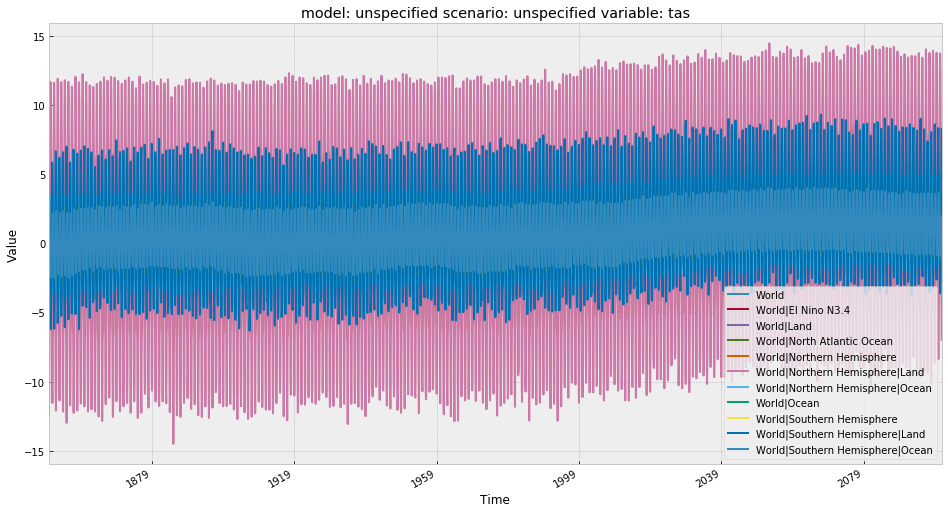

In [18]:
stitched_normalised.line_plot(color="region", figsize=(16, 9));

As we have monthly data, this doesn't tell us much yet. We can take an annual mean before plotting to see a clearer picture.

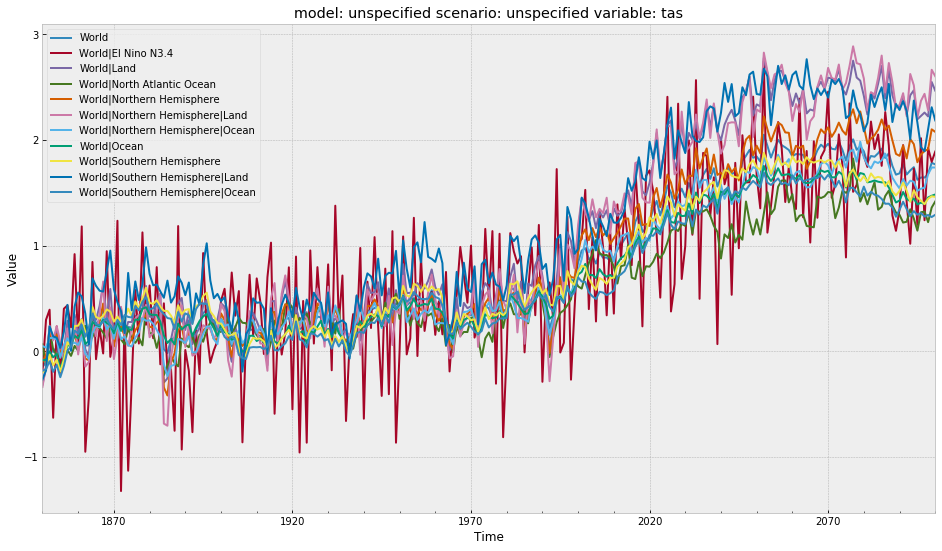

In [19]:
stitched_normalised.time_mean("AC").line_plot(color="region", figsize=(16, 9));

With a bit of digging, we can get see all the data used to make the above plot.

In [24]:
test_cmip6_crunch_output = os.path.join(
    "..", "tests", "test-data", "expected-crunching-output", "cmip6output"
)

In [59]:
def load_src(src):
    return load_scmdataframe(
        os.path.join(
            test_cmip6_crunch_output, 
            stitched_normalised.metadata["({}) netcdf-scm crunched file".format(src)],
        )
    )

child = load_src("child")
parent = load_src("parent")
normalisation = load_src("normalisation")

normalisation.head()

time                                                                                                                        1850-01-16 12:00:00  \
model       scenario   region             variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified historical World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  285.592955   
            piControl  World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  285.487919   
            ssp126     World              tas      K    ScenarioMIP BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            historical World|El Nino N3.4 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  301.011023   
            piControl  World|El Nino N3.4 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  299.072634   

time                                                                                                                        1850-02-15 00:00:00  \
model       scenario   region             variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified historical World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  285.827814   
            piControl  World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  285.769434   
            ssp126     World              tas      K    ScenarioMIP BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            historical World|El Nino N3.4 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  301.061735   
            piControl  World|El Nino N3.4 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  299.465637   

time                                                                                                                        1850-03-16 12:00:00  \
model       scenario   region             variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified historical World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  286.281974   
            piControl  World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  286.174939   
            ssp126     World              tas      K    ScenarioMIP BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            historical World|El Nino N3.4 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  300.680143   
            piControl  World|El Nino N3.4 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  299.799973   

time                                                                                                                        1850-04-16 00:00:00  \
model       scenario   region             variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified historical World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  287.736661   
            piControl  World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  287.622444   
            ssp126     World              tas      K    ScenarioMIP BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            historical World|El Nino N3.4 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  300.666310   
            piControl  World

We can use the metadata to recover the branching time. For the BCC model, the metadata appears to be wrong as the `branch_time_in_parent` attribute looks to be in years, rather than days as is expected (given the units provided).

In [61]:
parent.metadata["branch_time_in_parent"]

2289.0

In [62]:
parent.metadata["parent_time_units"]

'days since 1850-01-01'

Anyway, we can nonetheless determine the branch time. Due to the conflicting information above, here we simply assert things are expected and move on.

In [63]:
assert parent.metadata["branch_time_in_parent"] == 2289.0
assert parent.metadata["parent_time_units"] == "days since 1850-01-01"
branch_year = 2289

We can then shift our normalisation such that the branch times line up.

In [67]:
normalisation_shifted = normalisation.timeseries()
normalisation_shifted.columns = normalisation_shifted.columns.map(
    lambda x: dt.datetime(x.year - branch_year + parent["time"].min().year, x.month, x.day, x.hour)
)
normalisation_shifted = normalisation_shifted.reset_index()
normalisation_shifted["scenario"] = "piControl-shifted"
normalisation_shifted = df_append([normalisation_shifted])
normalisation_shifted.head()

time                                                                                                                                       1411-01-16 12:00:00  \
model       scenario          region                     variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified piControl-shifted World                      tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  285.487919   
                              World|El Nino N3.4         tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  299.072634   
                              World|Land                 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  274.787241   
                              World|North Atlantic Ocean tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  291.246503   
                              World|Northern Hemisphere  tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  280.951595   

time                                                                                                                                       1411-02-15 00:00:00  \
model       scenario          region                     variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified piControl-shifted World                      tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  285.769434   
                              World|El Nino N3.4         tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  299.465637   
                              World|Land                 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  275.162052   
                              World|North Atlantic Ocean tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  290.780598   
                              World|Northern Hemisphere  tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  281.493183   

time                                                                                                                                       1411-03-16 12:00:00  \
model       scenario          region                     variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified piControl-shifted World                      tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  286.174939   
                              World|El Nino N3.4         tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  299.799973   
                              World|Land                 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  276.320696   
                              World|North Atlantic Ocean tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  290.691142   
                              World|Northern Hemisphere  tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  282.957637   

time                                                                                                                                       1411-04-16 00:00:00  \
model       scenario          region                     variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified piControl-shifted World                      tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  287.622444   
                              World|El Nino N3.4         tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CM

In [68]:
source_data = df_append([
    child, parent, normalisation, normalisation_shifted
])
source_data.head()

time                                                                                                                               1411-01-16 12:00:00  \
model       scenario          region             variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified historical        World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            piControl         World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            piControl-shifted World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  285.487919   
            ssp126            World              tas      K    ScenarioMIP BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            historical        World|El Nino N3.4 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   

time                                                                                                                               1411-02-15 00:00:00  \
model       scenario          region             variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified historical        World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            piControl         World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            piControl-shifted World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  285.769434   
            ssp126            World              tas      K    ScenarioMIP BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            historical        World|El Nino N3.4 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   

time                                                                                                                               1411-03-16 12:00:00  \
model       scenario          region             variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified historical        World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            piControl         World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            piControl-shifted World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  286.174939   
            ssp126            World              tas      K    ScenarioMIP BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            historical        World|El Nino N3.4 tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   

time                                                                                                                               1411-04-16 00:00:00  \
model       scenario          region             variable unit activity_id climate_model member_id mip_era variable_standard_name                        
unspecified historical        World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            piControl         World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                         NaN   
            piControl-shifted World              tas      K    CMIP        BCC-CSM2-MR   r1i1p1f1  CMIP6   air_temperature                  287.622

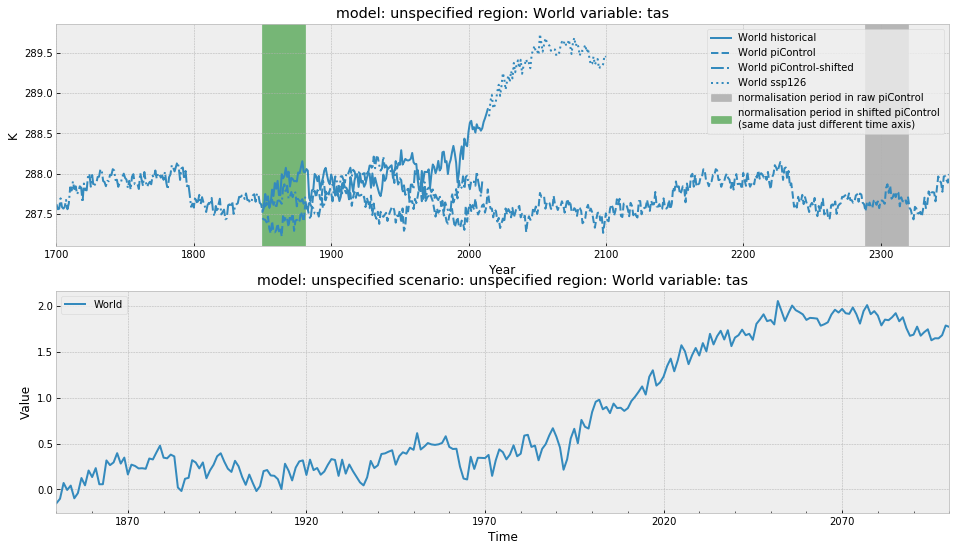

In [75]:
# plotting not playing nice so have to hack around...
region_to_plot = "World"
years_to_plot = range(1700, 2351)
fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(211)
plt_here = source_data.time_mean("AC").timeseries()
plt_here.columns = plt_here.columns.map(lambda x: x.year)
plt_here = pyam.IamDataFrame(plt_here)
plt_here.filter(
    region=region_to_plot, year=years_to_plot
).line_plot(color="region", linestyle="scenario", ax=ax)
ax.axvspan(
    branch_year, branch_year + 31, 
    label="normalisation period in raw piControl", 
    alpha=0.5, color="gray"
)
ax.axvspan(
    parent["time"].min().year, parent["time"].min().year + 31, 
    label="normalisation period in shifted piControl\n(same data just different time axis)", 
    alpha=0.5, color="green"
)
ax.legend()

ax = fig.add_subplot(212)
stitched_normalised.filter(
    region=region_to_plot, year=years_to_plot
).time_mean("AC").line_plot(color="region", ax=ax);

In the top panel above, we can see how the historical and ssp126 simulations have been joined. We can also see the normalisation period that is used. In the bottom panel, we can see the resulting stitched and normalised timeseries.